<a href="https://colab.research.google.com/github/ma-prietoo/SyS-2025-2/blob/Parcial-1-2025-2/Parcial1_Sys_2025_2_MariaPrieto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact
from scipy.spatial.distance import cdist

# Ejercicio 1.

La distancia media entre dos señales periódicas
x1(t) ∈ R,C y x2(t) ∈ R,C; se puede expresar a
partir de la potencia media de la diferencia entre ellas:

$$
d^2(x_1, x_2) = P_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt
$$

Sea \$ x_1(t)\ y \ x_2(t) \$ dos señales definidas como:

$
x_1(t) = A e^{-j n w_0 t} \ y \
x_2(t) = B e^{j m w_0 t}
$

con

$$
w_0 = \frac{2\pi}{T}; \quad T, A, B \in \mathbb{R}^+ \text{ y } n, m \in \mathbb{Z}.
$$

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.




In [19]:
# Definir simbolos -> t: tiempo, T: Periodo, A y B: amplitudes, nym: armónicos
t, T, A, B = sym.symbols('t T A B', real = True, positive = True)   # real y positive = True -> valores en R+
n, m = sym.symbols('n m', real = True, integer=True)   # integer -> Permite al sympy usar identidades al momento de integrar
w0 = 2*sym.pi/T   # w0: Frecuencia angular fundamental

# Definir señales
x1 = A*sym.exp(-sym.I*n*w0*t)   # sim.I (sympy) = j (numpy)
x2 = B*sym.exp(sym.I*m*w0*t)

# Calcular Potencia de cada señal
Px1 = (1/T)*sym.integrate(x1*sym.conjugate(x1), (t, 0, T))   # integrate -> integra
Px2 = (1/T)*sym.integrate(x2*sym.conjugate(x2), (t, 0, T))   # conjugate -> conjugado

# Calcular cruzado 1y2
C12 = (-2/T)*sym.integrate(x1*sym.conjugate(x2), (t, 0, T))
C12_simpl = sym.simplify(C12)   # simplify -> simplifica la ecuacion

Px1 + Px2 + C12_simpl

A**2 + B**2 + Piecewise((0, Ne(m, -n)), (-2*A*B, True))

# Ejercicio 2

Encuentre la señal en tiempo discreto al utilizar un conversor analógico–digital con frecuencia de muestreo de **5 kHz** y **4 bits** de capacidad de representación, aplicado a la señal continua:

$$
x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)
$$

Realizar la simulación del proceso de discretización (incluyendo al menos tres períodos de x(t) ).  
En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


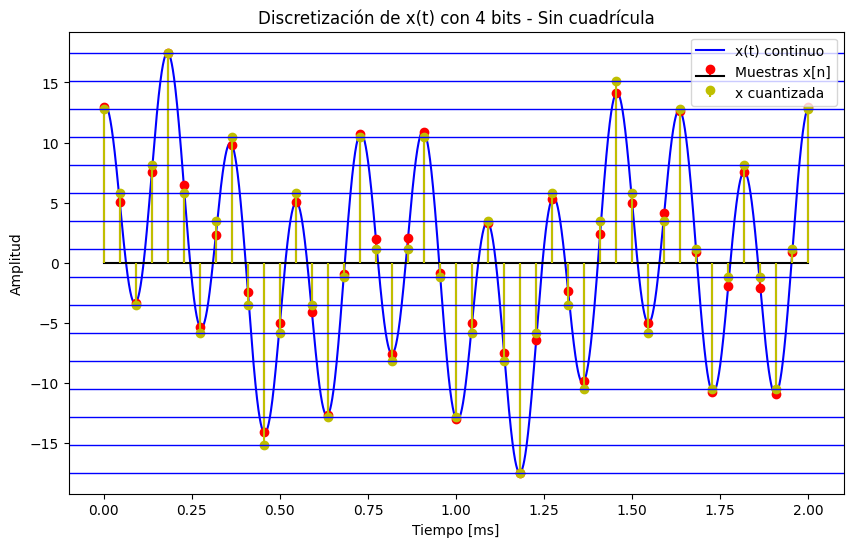

In [27]:
# Discretización de x(t)



# 1. Señal continua simbólica
t = sp.Symbol('t', real=True)
x_t = 3*sp.cos(1000*sp.pi*t) + 5*sp.sin(3000*sp.pi*t) + 10*sp.cos(11000*sp.pi*t)
x_t_func = sp.lambdify(t, x_t, 'numpy')

# 2. Tiempo continuo y discreto
fs = 22000         # frecuencia de muestreo adecuada (escogida)
Ts = 1/fs
t_cont = np.linspace(0, 2e-3, 4000)   # señal continua
t_n = np.arange(0, 2e-3, Ts)          # muestras discretas

# Señales
x_cont = x_t_func(t_cont)
x_n = x_t_func(t_n)

# 3. Niveles de cuantización
nbits = 4
niveles = 2**nbits
rmin = -max(abs(x_n))
rmax =  max(abs(x_n))
ve = np.linspace(rmin, rmax, niveles)

# 4. Cuantización
d = cdist(x_n.reshape(-1,1), ve.reshape(-1,1))
ind = np.argmin(d, axis=1)
xq = ve[ind]

# 5. Gráfica final (sin cuadrícula)
plt.figure(figsize=(10,6))

# Señal continua
plt.plot(t_cont*1000, x_cont, 'b', label='x(t) continuo')

# Muestras discretas
plt.stem(t_n*1000, x_n, linefmt='r-', markerfmt='ro', basefmt='k', label='Muestras x[n]')

# Señal cuantizada
plt.stem(t_n*1000, xq, linefmt='y-', markerfmt='yo', basefmt=' ', label='x cuantizada')

# Líneas horizontales de cuantización
for v in ve:
    plt.axhline(v, color='blue', linestyle='-', linewidth=1, alpha=1)

plt.title(f'Discretización de x(t) con {nbits} bits - Sin cuadrícula')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(False)  # para que no aparezca la cuadricula y la confunda con los 16 estados
plt.show()


#Ejercicio 3
Sea \(x''(t)\) la segunda derivada de la señal \(x(t)\), donde \(t \in [t_i, t_f]\).  
Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$$
c_n = \frac{1}{(t_i - t_f) \, n^2 \, \omega_0^2}
\int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} \, dt,
\quad n \in \mathbb{Z}.
$$

¿Cómo se pueden calcular los coeficientes \(a_n\) y \(b_n\) desde \(x''(t)\) en la serie trigonométrica de Fourier?

---

In [60]:
from sympy import symbols, Function, diff, Integral, exp, I, Eq
from sympy import init_printing
from sympy.printing.latex import latex
from IPython.display import display, Mathinit_printing(use_unicode=True)

# Declaración de variables simbólicas
t, ti, tf, n, w0 = symbols('t t_i t_f n ω₀', real=True)
x = Function('x')(t)
Xpp = diff(x, t, 2)

# Paso 1: Definición de la serie de Fourier
display(Math(r"x(t) = \sum_{n=-\infty}^{\infty} c_n e^{j n \omega_0 t}"))
display(Math(r"x''(t) = \sum_{n=-\infty}^{\infty} (j n \omega_0)^2 c_n e^{j n \omega_0 t}"))

# Paso 2: Expresión para c_n a partir de x(t)
display(Math(r"c_n = \frac{1}{t_f - t_i}\int_{t_i}^{t_f} x(t)e^{-j n \omega_0 t} dt"))

# Paso 3: Sustituyendo x''(t)
display(Math(r"\Rightarrow \int_{t_i}^{t_f} x''(t)e^{-j n \omega_0 t} dt "
             r"= \sum_{n=-\infty}^{\infty} (j n \omega_0)^2 c_n "
             r"\int_{t_i}^{t_f} e^{j n \omega_0 t}e^{-j n \omega_0 t} dt"))

display(Math(r"\Rightarrow c_n = \frac{1}{(t_i - t_f)(j n \omega_0)^2}"
             r"\int_{t_i}^{t_f} x''(t)e^{-j n \omega_0 t} dt"))

# Paso 4: Versión real con n² ω₀²
display(Math(r"c_n = -\frac{1}{(t_i - t_f)n^2\omega_0^2}"
             r"\int_{t_i}^{t_f} x''(t)e^{-j n \omega_0 t} dt"))

# Paso 5: Relación con a_n y b_n
display(Math(r"a_n = 2\,\Re\{c_n\} = "
             r"\frac{2}{(t_i - t_f)n^2\omega_0^2}\int_{t_i}^{t_f}x''(t)\cos(n\omega_0 t)\,dt"))

display(Math(r"b_n = -2\,\Im\{c_n\} = "
             r"\frac{2}{(t_i - t_f)n^2\omega_0^2}\int_{t_i}^{t_f}x''(t)\sin(n\omega_0 t)\,dt"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#Ejercicio 4
Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para  
$$n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$$  
a partir de \(x''(t)\) para la señal \(x(t)\) en la Figura.
Compruebe el espectro obtenido con la estimación a partir de \(x(t)\).  
Presente las simulaciones de **Python** respectivas.


In [46]:
# PARÁMETROS DE LA SEÑAL

A = 1.0       # Amplitud máxima de la señal
d1 = 1.0      # Semibase del triángulo interno
d2 = 2.0      # Semibase total (ancho mayor del trapecio)
T = 6.0       # Periodo de la señal (se repite cada T segundos)
omega0 = 2 * np.pi / T   # Frecuencia angular fundamental (ω0 = 2π/T)

# PENDIENTES DE LA DERIVADA x'(t)

m1 = A / (d2 - d1)   # Pendiente de la rampa inicial (-d2, -d1)
m2 = -A / d1         # Pendiente de la bajada (-d1, 0)

# PUNTOS DE CAMBIO Y SALTOS EN x'(t)

# Puntos donde la derivada cambia (en el tiempo)
t_points = np.array([-d2, -d1, 0.0, d1, d2])

# Saltos de pendiente en x'(t), usados para obtener x''(t) (derivada segunda)
jumps = np.array([
    m1,                                # En -d2
    m2 - m1,                           # En -d1
    2*A/d1,                            # En 0 (cambio fuerte)
    -A*(1/d1 + 1/(d2 - d1)),           # En d1
    m1                                 # En d2
])

# CÁLCULO DE LOS COEFICIENTES DE FOURIER (ANALÍTICOS)

# Rango de índices armónicos n a evaluar
n_list = np.arange(-20, 20)  # desde -20 hasta 20

# Inicializamos los coeficientes Y_n (de x''(t))
Yn = np.zeros(len(n_list), dtype=complex)

# Fórmula: Y_n = (1/T) * Σ [ salto * e^(-j n ω0 t_i) ]
for i, n in enumerate(n_list):
    Yn[i] = (1.0 / T) * np.sum(jumps * np.exp(-1j * n * omega0 * t_points))

# Obtenemos X_n a partir de Y_n: X_n = -Y_n / (n ω0)^2  (para n ≠ 0)
Xn = np.zeros_like(Yn, dtype=complex)
for i, n in enumerate(n_list):
    if n == 0:
        # El término promedio X_0 es el valor medio de la señal (área/T)
        Xn[i] = A * d2 / T
    else:
        Xn[i] = -Yn[i] / ((n * omega0) ** 2)

# CONSTRUCCIÓN DE LA SEÑAL ORIGINAL POR TRAMOS

N = 20000                             # número de muestras por periodo
t = np.linspace(-T/2, T/2, N)        # vector de tiempo
x = np.zeros_like(t)                 # inicializamos señal

# Definición de la señal en cada tramo:
mask = (t >= -d2) & (t < -d1)
x[mask] = m1 * (t[mask] + d2)

mask = (t >= -d1) & (t < 0)
x[mask] = A + m2 * (t[mask] + d1)

mask = (t >= 0) & (t < d1)
x[mask] = (A / d1) * t[mask]

mask = (t >= d1) & (t < d2)
x[mask] = A - (A / (d2 - d1)) * (t[mask] - d1)




In [52]:
# ============================================================
# FUNCIÓN DE RECONSTRUCCIÓN INTERACTIVA
# ============================================================
"""
    Reconstruye la señal usando N_max armónicos de la serie de Fourier.

    Parámetro:
    -----------
    N_max : int
        Número máximo de armónicos a incluir en la reconstrucción.
"""
def reconstruir(N_max=5):

    # Vector de tiempo
    t_rec = np.linspace(-T/2, T/2, N)
    x_rec = np.zeros_like(t_rec, dtype=complex)

    # Reconstrucción parcial: suma de n=-N_max a N_max
    for i, n in enumerate(n_list):
        if abs(n) <= N_max:
            x_rec += Xn[i] * np.exp(1j * n * omega0 * t_rec)

    x_rec = np.real(x_rec)  # tomamos solo la parte real

    # Gráfica comparativa
    plt.figure(figsize=(8,4))
    plt.plot(t, x, 'k', label='x(t) original', linewidth=2)
    plt.plot(t_rec, x_rec, 'r--', label=f'Reconstrucción con N={N_max}', linewidth=1.2)
    plt.title('Reconstrucción de la señal periódica')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.legend()
    plt.show()

# ============================================================
# WIDGET INTERACTIVO
# ============================================================

# "interact" permite crear un control deslizante (slider)
# que llama automáticamente la función "reconstruir" al moverlo.
# El argumento "N_max" varía entre 1 y el máximo número de armónicos posibles.
interact(reconstruir, N_max=(1, len(n_list)//2))

interactive(children=(IntSlider(value=5, description='N_max', max=20, min=1), Output()), _dom_classes=('widget…

<function __main__.reconstruir(N_max=5)>

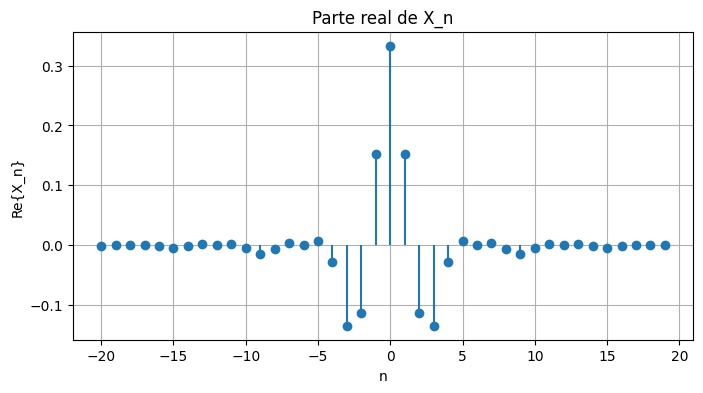

In [53]:
# GRÁFICOS ESTÁTICOS DE LOS COEFICIENTES Xn

plt.figure(figsize=(8,4))
plt.stem(n_list, np.real(Xn), basefmt=" ")
plt.title('Parte real de X_n')
plt.xlabel('n')
plt.ylabel('Re{X_n}')
plt.grid(True)
plt.show()

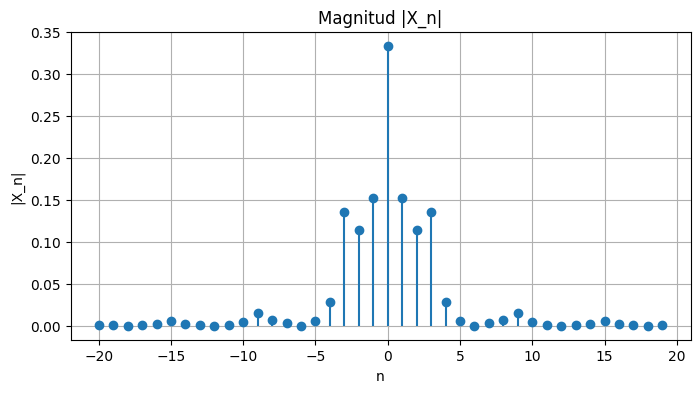

In [54]:
plt.figure(figsize=(8,4))
plt.stem(n_list, np.abs(Xn), basefmt=" ")
plt.title('Magnitud |X_n|')
plt.xlabel('n')
plt.ylabel('|X_n|')
plt.grid(True)
plt.show()

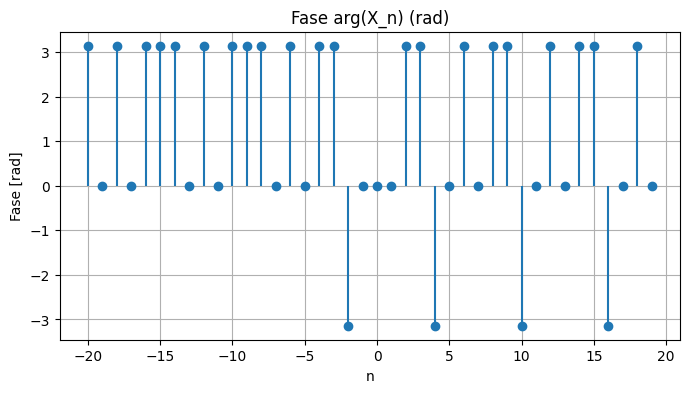

In [55]:
plt.figure(figsize=(8,4))
plt.stem(n_list, np.angle(Xn), basefmt=" ")
plt.title('Fase arg(X_n) (rad)')
plt.xlabel('n')
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>